In [1]:
from datetime import datetime, timedelta
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

sys.path.append('..')
from util.batcher import Batcher
#from util.stock_loader import Loader

In [2]:
TODAY = datetime.now().date()
TOMORROW  = TODAY + timedelta(1)
TOMORROW

datetime.date(2022, 10, 15)

In [3]:
DATA = '../data'

sp1950 = pd.read_csv(f'{DATA}/sp1950.csv')
nya1965 = pd.read_csv(f'{DATA}/nya1965.csv')
nasdaq1965 = pd.read_csv(f'{DATA}/nasdaq1965.csv')
wilshire1990 = pd.read_csv(f'{DATA}/wilshire1990.csv')


nasdaq1965.tail()
states = pd.read_csv(f'{DATA}/hmm_exp_returns.csv')
states.index = pd.to_datetime(states.Date)
states.tail()

,Date,sp,sp_daily,sp_exp,nyse,nyse_daily,nyse_exp,nas,nas_daily,nas_exp,wil,wil_daily,wil_exp,mean_exp,state
Date,,,,,,,,,,,,,,,
2022-10-10,2022-10-10,3612.389893,0.992508,0.999998,13693.570312,0.992413,0.99982,10542.099609,0.989645,1.000432,36126.320312,0.991940,1.000332,1.000145,1
2022-10-11,2022-10-11,3588.840088,0.993481,0.999998,13608.089844,0.993758,0.99982,10426.190430,0.989005,1.000432,35911.761719,0.994061,1.000332,1.000145,1
2022-10-12,2022-10-12,3577.030029,0.996709,0.999998,13546.799805,0.995496,0.99982,10417.099609,0.999128,1.000432,35809.679688,0.997157,1.000332,1.000145,1
2022-10-13,2022-10-13,3669.909912,1.025966,0.999998,13888.969727,1.025258,0.99982,10649.150391,1.022276,1.000432,36672.738281,1.024101,1.000332,1.000145,1
2022-10-14,2022-10-14,3583.070068,0.976337,0.999998,13607.306641,0.979720,0.99982,10321.388672,0.969222,1.000432,35778.628906,0.975619,1.000332,1.000145,1


In [4]:
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ADBE', 'ADYEY', 'AMD', 'AMGN', 'AMZN',
    'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD', 'DDOG',
    'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY', 'FLGT', 'GH', 'GMED',
    'GOOG', 'IDXX', 'INTG', 'ISRG', 'JD', 'LRCX', 'LSPD', 'LULU', 'MDB',
    'MELI', 'MNST', 'MSFT', 'MTCH', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'ROKU', 'RVLV', 'SE', 'SHOP',
    'SNOW', 'TASK', 'TDOC', 'TEAM', 'TREX', 'TSLA', 'TTD', 'TTWO',
    'TWLO', 'TWTR', 'TYL', 'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZEN',
    'ZM']
LINGERERS = [
    'AMEH', 'AMRK', 'APT', 'BTTR', 'BYRN', 'CIZN', 'CUBE', 'DTST',
    'DYAI', 'EP', 'FCPT', 'FCUV', 'GBOX', 'GME', 'HMY', 'IEI', 'INTZ',
    'KREF', 'MCVT', 'MICS', 'MNMD', 'OMQS', 'PETV', 'POWW', 'PRPH',
    'RVP', 'VIRT', 'WAVD', 'WKHS', 'ZYXI']
BEST_WEIGHTED = [
    'AMRC', 'COOP', 'CSIQ', 'CTSH', 'CVE', 'ENPH', 'EPSN', 'FKWL',
    'GCBC', 'GGB', 'GGE', 'LFMD', 'NTAP', 'PACB', 'SNEX', 'SOBR', 'TJX',
    'UTHR', 'VTSI']
len(SYMBOLS)

75

In [5]:
TODAY = (datetime.now() + timedelta(1)).date()
YEARS_OF_DATA = 10
START = TODAY - timedelta(YEARS_OF_DATA * 365)
START, TODAY

(datetime.date(2012, 10, 17), datetime.date(2022, 10, 15))

In [6]:
batch = sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED)))

In [7]:
data = (
    yf
    .download(batch, start=START, end=TODAY)
    .rename(columns={'Adj Close': 'AdjClose'})
    .sort_index())

[*********************100%***********************]  124 of 124 completed


In [8]:
data['state'] = states.state
data.tail()

AdjClose                                                        \
                  AAPL        ABMD        ABNB        ADBE  ADYEY        AMD   
Date                                                                           
2022-10-10  140.419998  247.029999  110.989998  285.720001  12.27  57.810001   
2022-10-11  138.979996  243.139999  106.820000  284.829987  12.10  57.630001   
2022-10-12  138.339996  242.770004  112.349998  286.149994  12.24  57.849998   
2022-10-13  142.990005  258.079987  112.650002  294.739990  12.45  58.939999   
2022-10-14  138.380005  249.279999  109.160004  287.940002  12.25  55.939999   

                                                         ...     Volume  \
                 AMEH        AMGN       AMRC       AMRK  ...        VLD   
Date                                                     ...              
2022-10-10  33.630001  232.149994  62.349998  28.000000  ...  1543700.0   
2022-10-11  33.540001  245.440002  62.500000  27.320000  ...  1930300.0   
2022-10-12  32.680000  246.440002  62.240002  27.200001  ...  1063600.0   
2022-10-13  33.320000  251.660004  63.299999  28.190001  ...  1221900.0   
2022-10-14  31.500000  251.339996  61.459999  26.440001  ...   833518.0   

                                                                               \
               VRTX   VTSI    WAVD     WKHS        XPEV        ZEN         ZM   
Date                                                                            
2022-10-10   835000   8100   93100  3119200  22884000.0  1585900.0  4777500.0   
2022-10-11  1261200  11000  100400  2710600  30129500.0  2558700.0  5389700.0   
2022-10-12   928500  12900   15100  2775200  22799000.0  1114500.0  3941000.0   
2022-10-13  1124500  14400   12500  3426800  25180500.0   865600.0  5754500.0   
2022-10-14  1027720   9649   18086  3343575  30502943.0   696797.0  2830279.0   

                   state  
              ZYXI        
Date                      
2022-10-10   90100     1  
2022-10-11  105100     1  
2022-10-12   68200     1  
2022-10-13  121900     1  
2022-10-14   75971     1  

[5 rows x 745 columns]

In [9]:
STATES = sorted(states.state.unique())
STATES

[0, 1, 2, 3, 4, 5, 6, 7]

In [10]:
CURRENT_STATE = states.state[-1]
CURRENT_STATE

1

In [11]:
def get_stock_data(stock, data):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (
        sub.AdjClose[stock][sub.AdjClose[stock].notna()].index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    return sub

In [12]:
def get_daily_returns(x):
    idx = x.index
    n = len(x)
    x = np.array(x)
    #return x[2:n] / x[1:(n - 1)] - 1 
    returns = x[1:n] / x[0:(n-1)] - 1
    returns = pd.Series(returns, index=idx[1:])
    return returns

In [13]:
def get_sharpe(returns, window=None):
    n = len(returns)
    if window is None:
        window = n
    if len(returns) > window:
        returns = returns[(n - window):n]
    returns = returns[~np.isnan(returns)]
    sharpe = (np.sqrt(252) * returns.mean()) / returns.std()
    return sharpe

In [14]:
def get_hedged_sharpe(daily_returns, data):
    state_sharpe = get_sharpe(
        daily_returns[data.state == CURRENT_STATE])
    lower_state_sharpe = get_sharpe(
        daily_returns[data.state == max(CURRENT_STATE - 1, 0)])
    upper_state_sharpe = get_sharpe(
        daily_returns[
            data.state == min(CURRENT_STATE + 1, max(STATES))])
    return min(state_sharpe, lower_state_sharpe, upper_state_sharpe)

In [15]:
def get_weighted_sharpe(daily_returns, data, weights=[0.2, 0.6, 0.2]):
    state_sharpe = get_sharpe(
        daily_returns[data.state == CURRENT_STATE])
    lower_state_sharpe = get_sharpe(
        daily_returns[data.state == max(CURRENT_STATE - 1, 0)])
    upper_state_sharpe = get_sharpe(
        daily_returns[
            data.state == min(CURRENT_STATE + 1, max(STATES))])
    return (
        weights[0]*lower_state_sharpe
        + weights[1]*state_sharpe
        + weights[2]*upper_state_sharpe)

In [16]:
def rescale(a):
    a = a - a.min()
    a = a / a.max()
    return a

In [17]:
def vals_to_quantiles(a):
    n = len(a)
    qs = np.linspace(0, 1, n)
    order = np.argsort(a)
    out = qs[order]
    return out

In [18]:
def get_rsi(stock_data, window=14):
    df = stock_data.copy()
    df['deltas'] = df.AdjClose.diff(1)
    df['gains'] = df.deltas.clip(lower=0)
    df['losses'] = df.deltas.clip(upper=0).abs()
    df['avg_gain'] = (df.gains
                      .rolling(window=window, min_periods=window)
                      .mean()[:window + 1])
    df['avg_loss'] = (df.losses
                      .rolling(window=window, min_periods=window)
                      .mean()[:window + 1])
    
    # avg gains
    pd.options.mode.chained_assignment = None
    for i, row in enumerate(df.avg_gain.iloc[window + 1:]):
        df.avg_gain.iloc[i + window + 1] = (
            (df.avg_gain.iloc[i + window] * (window - 1) 
             + df.gains.iloc[i + window + 1]) 
            / window)
    # avg losses
    for i, row in enumerate(df.avg_loss.iloc[window + 1:]):
        df.avg_loss.iloc[i + window + 1] = (
            (df.avg_loss.iloc[i + window] * (window - 1)
             + df.losses.iloc[i + window + 1])
            / window)
    df['rs'] = df.avg_gain / df.avg_loss
    df['rsi'] = 100 - (100 / (1. + df.rs))
    return df.rsi

In [19]:
def get_macd(stock_data, fast=60, slow=90, signal=80, plot=False):
    df = stock_data.copy()
    exp1 = df.AdjClose.ewm(span=fast, adjust=False).mean()
    exp2 = df.AdjClose.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    if plot:
        plt.plot(macd, label='MACD', color='red')
        plt.plot(exp3, label='Signal', color='green')
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
        plt.legend();
        plt.figure()
        plt.plot(histo, color='blue')
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
        plt.axhline(y=0, color='k')
        plt.figure()
        plt.plot(is_rising)
        #plt.xlim(pd.to_datetime('2021-01-01'), 
        #         pd.to_datetime('2021-10-14'))
    return is_rising

In [20]:
LMB = 0.9
RSI_WINDOW = 14
MACD_PARAMS = (60, 90, 80, False)

In [21]:
EXAMPLE = 'AAPL'

In [22]:
stock_data = get_stock_data(EXAMPLE, data.copy())
daily_returns = get_daily_returns(stock_data.AdjClose)
daily_returns
(get_sharpe(daily_returns), 
 get_sharpe(daily_returns[data.state == CURRENT_STATE]))

(0.8190611928499429, 0.5530405202610248)

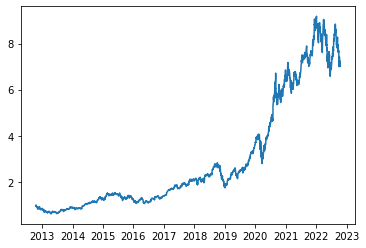

In [23]:
plt.plot(
    (get_daily_returns(data[('AdjClose', EXAMPLE)]) + 1).cumprod());

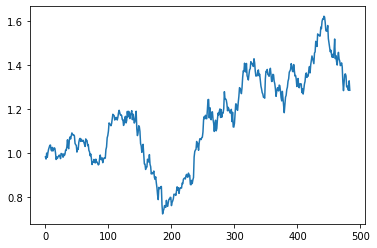

In [24]:
dr = get_daily_returns(
    data[('AdjClose', EXAMPLE)]
)[data.state == CURRENT_STATE]
dr = dr[dr.notnull()]
plt.plot((dr + 1).to_numpy().cumprod());

In [25]:
get_weighted_sharpe(daily_returns, data.copy())

-0.15593763555154222

In [26]:
def process_stock(stock, data, lmb=LMB, plot=False):
    stock_data = get_stock_data(stock, data)
    n = len(stock_data.AdjClose[~np.isnan(stock_data.AdjClose)])
    stock_data['direction'] = get_macd(stock_data, *MACD_PARAMS)
    stock_data['rsi'] = get_rsi(stock_data, window=RSI_WINDOW)
    stock_data.rsi = stock_data.rsi.rank(pct=True)
    daily_returns = get_daily_returns(stock_data.AdjClose)
    sharpe = get_sharpe(daily_returns)
    #state_sharpe = get_sharpe(
    #    daily_returns[data.state == CURRENT_STATE])
    #hedged_sharpe = get_hedged_sharpe(daily_returns, data)
    weighted_sharpe = get_weighted_sharpe(daily_returns, data)
    stock_data.fillna(method='ffill', inplace=True)
    stock_data.fillna(method='bfill', inplace=True)
    WINDOW = min(n // 2, 125)
    stock_data['ann_high'] = (
        stock_data.AdjClose.rolling(window=WINDOW).max())
    stock_data['ann_low'] = (
        stock_data.AdjClose.rolling(window=WINDOW).min())
    stock_data['drawdown'] = stock_data.AdjClose / stock_data.ann_high
    stock_data.drawdown = stock_data.drawdown.rank(pct=True)
    stock_data['pullup'] = stock_data.AdjClose / stock_data.ann_low
    stock_data.pullup = stock_data.pullup.rank(pct=True)
    w = [lmb ** t for t in range(n)][::-1]
    stock_data['W'] = w
    stock_data['n_samp'] = (stock_data.Volume / 100)  * stock_data.W
    stock_data['value'] = (
        (stock_data.AdjClose 
         + stock_data.High 
         + stock_data.Low 
         + stock_data.Open) 
        / 4)
    stock_data['est'] = np.nan
    for day in stock_data.index:
        sub = stock_data[stock_data.index <= day]
        weights = sub.n_samp
        weights = weights / weights.sum()
        values = sub.value
        est = np.dot(weights, values)
        stock_data.loc[day, 'est'] = est
    stock_data['resid'] = stock_data.AdjClose / stock_data.est
    stock_data.resid = stock_data.resid.rank(pct=True)
    stock_data.sort_values('resid', inplace=True)
    n_notnull_resid = stock_data.resid.notnull().sum()
    stock_data['dev'] = np.nan
    stock_data.loc[stock_data.resid.notnull(), 'dev'] = (
        np.array(range(n_notnull_resid) / n_notnull_resid))
    stock_data.dev = stock_data.dev.rank(pct=True)
    stock_data.sort_index(inplace=True)
    if plot:
        plt.figure(figsize=(12, 8))
        plt.plot(stock_data.AdjClose, label='AdjClose')
        plt.plot(stock_data.est, label='Est')
        plt.yscale('log')
        plt.plot(stock_data.ann_high, color='green')
        plt.plot(stock_data.ann_low, color='red')
        plt.legend();
        
        plt.figure(figsize=(12, 4))
        plt.plot(stock_data.dev)
        plt.axhline(0.5, color='k')
        plt.title(stock)
        
        plt.figure(figsize=(12, 4))
        plt.plot(stock_data.drawdown, color='red', label='drawdown')
        plt.plot(stock_data.pullup, color='green', label='pullup')
        plt.plot(
            np.sqrt(stock_data.drawdown * stock_data.pullup),
            color='grey',
            label='geomean')
        plt.yscale('log')
        plt.legend()
    return (
        stock_data.direction.tolist()[-1],
        stock_data.rsi.tolist()[-1],
        stock_data.resid.tolist()[-1], 
        stock_data.dev.tolist()[-1],
        stock_data.drawdown.tolist()[-1],
        stock_data.pullup.tolist()[-1],
        sharpe,
        #state_sharpe,
        #hedged_sharpe,
        weighted_sharpe)

(0,
 0.09316273490603759,
 0.4115308151093439,
 0.4115308151093439,
 0.08448347971560016,
 0.08490171476369719,
 0.8190611928499429,
 -0.15593763555154222)

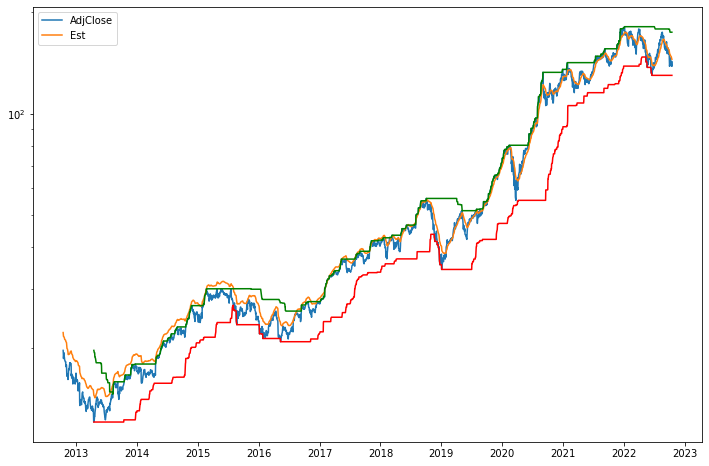

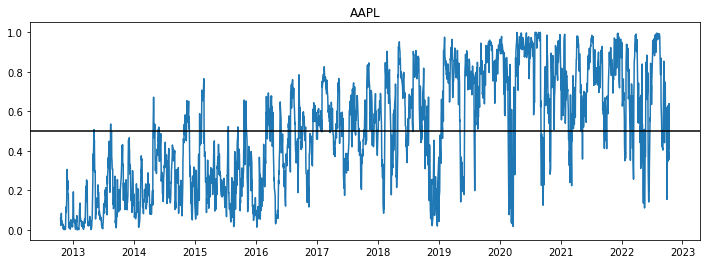

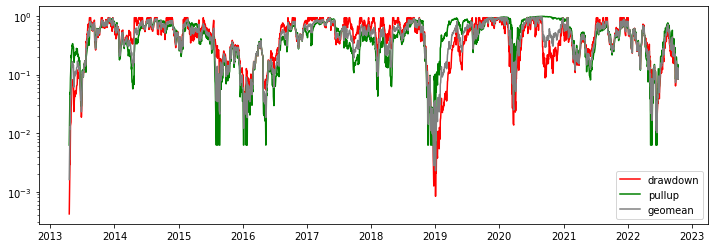

In [27]:
process_stock('AAPL', data.copy(), plot=True)

In [28]:
out = []
for stock in batch:
    print(f'{stock}...', end=' ')
    stock_stats = process_stock(stock, data)
    out.append([stock, *stock_stats])

AAPL... ABMD... ABNB... ADBE... ADYEY... AMD... AMEH... AMGN... AMRC... AMRK... AMZN... ANET... APT... ASML... AXON... BROS... BTTR... BYND... BYRN... CHWY... CIZN... COOP... CRWD... CSIQ... CTSH... CUBE... CVE... DDOG... DOCS... DOCU... DTST... DUOL... DYAI... EDIT... ENPH... EP... EPSN... ETSY... FCPT... FCUV... FKWL... FLGT... GBOX... GCBC... GGB... GGE... GH... GME... GMED... GOOG... HMY... IDXX... IEI... INTG... INTZ... ISRG... JD... KREF... LFMD... LRCX... LSPD... LULU... MCVT... MDB... MELI... MICS... MNMD... MNST... MSFT... MTCH... NTAP... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN... ROKU... RVLV... RVP... SE... SHOP... SNEX... SNOW... SOBR... TASK... TDOC... TEAM... TJX... TREX... TSLA... TTD... TTWO... TWLO... TWTR... TYL... UPST... UTHR... VEEV... VIRT... VLD... VRTX... VTSI... WAVD... WKHS... XPEV... ZEN... ZM... ZYXI... 

In [29]:
out_df = pd.DataFrame(
    data=out, 
    columns=[
        'stock', 'direction', 'RSI', 'fair_value_mult', 'dev_quantile',
        'drop','climb', 'sharpe', 'weighted_sharpe'])
out_df['geomean'] = np.sqrt(out_df['drop'] * out_df.climb)
out_df['score'] = (
    out_df.fair_value_mult
    * out_df.dev_quantile
    * out_df['drop']
    * out_df.climb) ** (1/4) 
out_df['RSIRev'] = 1 - out_df.RSI
out_df = out_df[
    ['stock', 'direction', 'RSI', 'RSIRev', 'fair_value_mult', 
     'dev_quantile', 'drop', 'climb', 'geomean', 'score',  'sharpe',
     'weighted_sharpe']]
out_df.RSI.fillna(out_df.RSI.median())
out_df.RSIRev.fillna(out_df.RSIRev.median())

out_df.weighted_sharpe.fillna(
    out_df.weighted_sharpe.mean(), inplace=True)
out_df.sort_values('stock')
out_df.head()

,stock,direction,RSI,RSIRev,fair_value_mult,dev_quantile,drop,climb,geomean,score,sharpe,weighted_sharpe
0,AAPL,0,0.093163,0.906837,0.411531,0.411531,0.084483,0.084902,0.084692,0.186691,0.819061,-0.155938
1,ABMD,0,0.274690,0.725310,0.269185,0.269185,0.192806,0.178586,0.185560,0.223495,0.787302,-0.050693
2,ABNB,0,0.414634,0.585366,0.393548,0.393548,0.243402,0.542522,0.363388,0.378168,0.020120,-0.543394
3,ADBE,0,0.061176,0.938824,0.121272,0.121272,0.028858,0.066081,0.043669,0.072773,0.850215,-0.290342
4,ADYEY,0,0.146471,0.853529,0.162092,0.162092,0.198128,0.043682,0.093030,0.122798,0.689643,0.405297


In [30]:
out_df.geomean.quantile([0.05, 0.99])

0.05    0.009886
0.99    0.751820
Name: geomean, dtype: float64

In [31]:
out_df.to_csv('individ_quantiles.csv', index=False)

In [32]:
!open individ_quantiles.csv